<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_1_2_exercice_knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [32]:
import pandas as pd
import numpy as np

housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")

In [33]:
housing.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,420000,585,3,1,2,yes,no,yes,no,no,1,no
1,385000,400,2,1,1,yes,no,no,no,no,0,no
2,495000,306,3,1,1,yes,no,no,no,no,0,no
3,605000,665,3,1,2,yes,yes,no,no,no,0,no
4,610000,636,2,1,1,yes,no,no,no,no,0,no
5,660000,416,3,1,1,yes,yes,yes,no,yes,0,no
6,660000,388,3,2,2,yes,no,yes,no,no,2,no
7,690000,416,3,1,3,yes,no,no,no,no,0,no
8,838000,480,3,1,1,yes,yes,yes,no,no,0,no
9,885000,550,3,2,4,yes,yes,no,no,yes,1,no


In [34]:
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

# K plus proches voisins

## Variable numérique

In [35]:
X = housing[['lotsize']]
y = housing[['price']]

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

####
# écrire le code ici : knnreg = ...
#knnreg= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
#knnreg.fit(X_train, y_train) 
knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train,y_train)
####

In [37]:
y_pred= knnreg.predict(X_test)
y_pred

array([[ 855800.],
       [ 907000.],
       [ 603000.],
       [ 884000.],
       [ 628000.],
       [ 772000.],
       [ 578800.],
       [ 663800.],
       [ 805900.],
       [ 452800.],
       [ 488600.],
       [ 459000.],
       [ 812000.],
       [1115000.],
       [ 448800.],
       [ 690400.],
       [ 508000.],
       [1247800.],
       [ 811000.],
       [ 883000.],
       [ 862800.],
       [1130800.],
       [ 627400.],
       [ 508000.],
       [ 613000.],
       [ 884000.],
       [ 435000.],
       [ 670000.],
       [ 557800.],
       [ 622300.],
       [ 704400.],
       [ 749800.],
       [ 454800.],
       [ 566600.],
       [ 708000.],
       [ 508000.],
       [ 621600.],
       [ 452800.],
       [ 548000.],
       [ 435000.],
       [1050000.],
       [ 756400.],
       [ 796000.],
       [ 583800.],
       [ 887000.],
       [ 768000.],
       [ 786400.],
       [ 524200.],
       [1051600.],
       [1051600.],
       [ 696000.],
       [ 601200.],
       [ 953

### Tester plusieurs valeurs de l'hyperparamètre

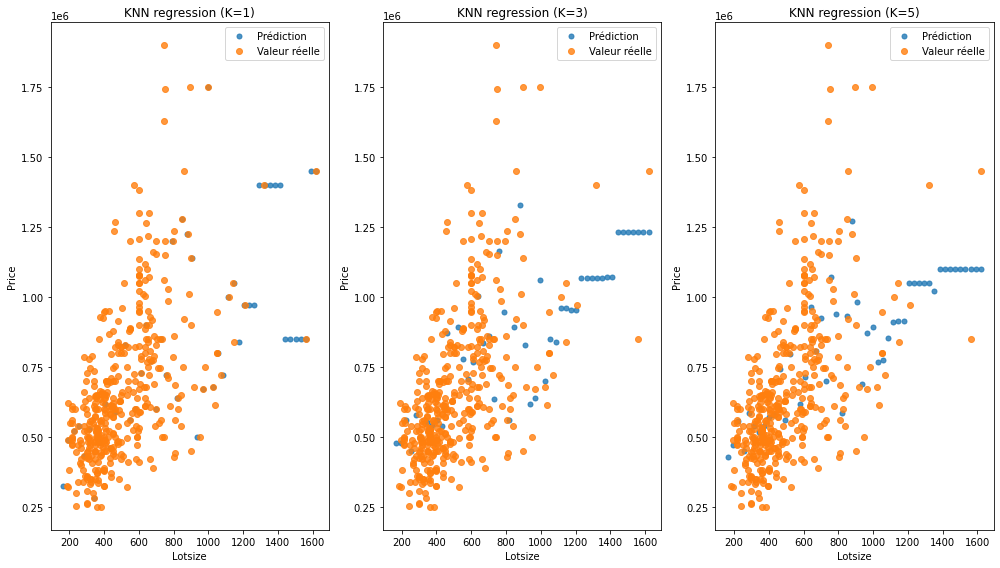

In [38]:
fig, subaxes = plt.subplots(1, 3, figsize=(14,8))
X_predict_input = np.linspace(X.min(), X.max(), 50).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3,5]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)

    ####
    knnreg.predict(X_test)
    ####
    
    y_predict_output = knnreg.predict(X_predict_input)
    
    thisaxis.plot(X_predict_input, y_predict_output, '.', markersize = 10,
                 label='Prédiction', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='Valeur réelle', alpha=0.8)
    thisaxis.set_xlabel('Lotsize')
    thisaxis.set_ylabel('Price')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Performance du modèle

**Question** Calculer le RMSE du modèle

In [39]:
from sklearn.metrics import mean_squared_error
mse = format(np.power(y_test-knnreg.predict(X_test),2).mean())
print ("The MSE is:",mse)
print ("The RMSE is:",np.sqrt(np.power(y_test-knnreg.predict(X_test),2)))

The MSE is: price    5.115014e+10
dtype: float64
The RMSE is:         price
85   285800.0
436  413000.0
96    64000.0
186  437000.0
134   22000.0
..        ...
490  551600.0
545   55200.0
231   12000.0
213    4000.0
408   63800.0

[137 rows x 1 columns]


### Courbe de l'erreur avec le split apprentissage/test


**Question** créer une boucle pour afficher l'évolution des erreurs de l'apprentissage et du test


    parameter  train_score  test_score
0           1     0.073284    0.107564
1           2     0.073284    0.107564
2           3     0.073284    0.107564
3           4     0.073284    0.107564
4           5     0.073284    0.107564
5           6     0.073284    0.107564
6           7     0.073284    0.107564
7           8     0.073284    0.107564
8           9     0.073284    0.107564
9          10     0.073284    0.107564
10         11     0.073284    0.107564
11         12     0.073284    0.107564
12         13     0.073284    0.107564
13         14     0.073284    0.107564


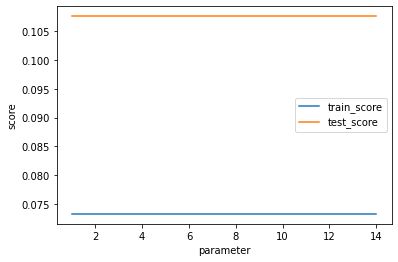

In [44]:

from sklearn import model_selection,linear_model

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

rows = []

for i in range(1,15):
    ###
    # écrire le code ici pour entraîner le modèle
    model_obj = linear_model.LinearRegression()
    model_fit = model_obj.fit(X_train,y_train)
    prediction = model_obj.predict(X_test)

    ###
    rows.append([i,model_obj.score(X_train, y_train), model_obj.score(X_test, y_test)])
print("")

res_scores = pd.DataFrame(rows, columns=["parameter","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="parameter",y="train_score")

plt.plot(res_scores["parameter"],res_scores["test_score"], label = "test_score")
plt.xlabel('parameter')
plt.ylabel('score')
plt.legend()
plt.show()

## variable catégorique

**Question** Réaliser les mêmes analyses pour une variable catégoriques

- Création d'un modèle
- Visualiser les résultats en fonction de plusieurs valeurs de l'hyperparamètre
- Créer les courbes des erreurs de l'apprentissage et du test



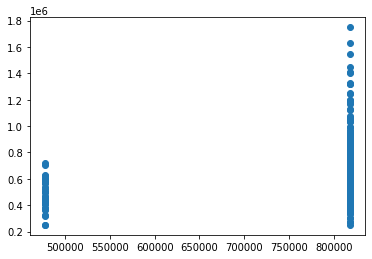

In [46]:
X = housing[['driveway']]
y = housing[['price']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

knnreg1 = KNeighborsRegressor(n_neighbors=6).fit(X_train,y_train)
predX = knnreg1.predict(X_test)
plt.scatter(predX,y_test)
plt.show()

## Variables mixtes

**Question** Réaliser les mêmes analyses pour une variable et une variable continue.

- Création d'un modèle
- Visualiser les résultats en fonction de plusieurs valeurs de l'hyperparamètre
- Créer les courbes des erreurs de l'apprentissage et du test
- Tester l'effet de la normalisation



In [47]:
X = housing[['lotsize',"driveway"]]
y = housing[['price']]


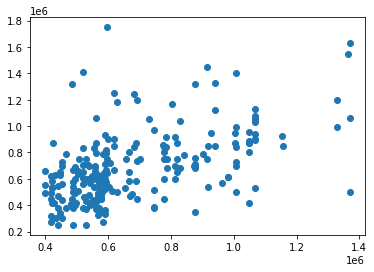

In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

knnreg2 = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
predX2 = knnreg2.predict(X_test)
plt.scatter(predX2,y_test)
plt.show()

## Toutes les variables

**Question** Réaliser les mêmes analyses avec toutes les variables.

- Création d'un modèle
- Visualiser les résultats en fonction de plusieurs valeurs de l'hyperparamètre
- Créer les courbes des erreurs de l'apprentissage et du test
- Tester l'effet de la normalisation

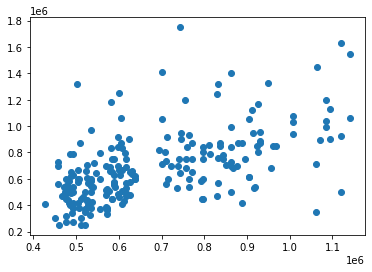

In [50]:
X = housing[['driveway','lotsize','bedrooms','bathrms']]
y = housing[['price']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

knnreg3 = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
predX3 = knnreg3.predict(X_test)
plt.scatter(predX3,y_test)
plt.show()